
### Lab 3 – Project (Titanic)Predicting a Categorical Target and Evaluating Performance
#### By: Sandra Ruiz Date: March 28,2025

##### In this project, we are going to use a model to predict survival on the Titanic from various input features. We will train multiple models, evaluate performance using key metrics, and create visualizations to interpret the results.

#### We will use three common classification models in this lab.

#### Decision Tree Classifier (DT)
A Decision Tree splits data into smaller groups based on decision rules (like "is height greater than 150 cm?"). It’s like a flowchart, where each decision point leads to another question until a final classification is reached.
Strengths: Easy to interpret and fast to train.
Weaknesses: Can overfit if the tree becomes too complex.
Support Vector Machine (SVM)
#### A Support Vector Machine tries to find the "best boundary" (a hyperplane) that separates data into classes. It works well with complex data and small datasets.
Strengths: Effective when there is a clear margin of separation between classes.
Weaknesses: Computationally expensive for large datasets.

Neural Network (NN)
#### A Neural Network is inspired by how human brains process information. It consists of layers of interconnected "neurons" that process input data and adjust based on feedback

Strengths: Can handle complex patterns and non-linear relationships.
Weaknesses: Needs more data and tuning to avoid overfitting.
When trying to classify data, using three (or more) models can help:

Decision Trees illustrate how individual features contribute to classification.
SVMs are good at finding complex boundaries.
Neural Networks are good at learning patterns from complex data.

### Section 1. Import and Inspect the Data

In [ ]:
import seaborn as sns
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

# sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

!python -m pip install --upgrade pip
!python -m pip install seaborn pandas matplotlib scikit-learn notebook ipykernel



In [3]:
# all imports get moved to the top - import each only once

import seaborn as sns
import pandas as pd

# Load Titanic dataset
titanic = sns.load_dataset('titanic')
titanic.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### Section 2. Data Exploration and Preparation


In [ ]:
#### 2.1 Handle Missing Values and Clean Data

##### Impute missing values for age using the median:
titanic['age'].fillna(titanic['age'].median(), inplace=True)

##### Fill in missing values for embark_town using the mode:

titanic['embark_town'].fillna(titanic['embark_town'].mode()[0], inplace=True)

##### Or can use similar, results are same.

In [6]:
titanic.loc[:, 'age'] = titanic['age'].fillna(titanic['age'].median())
titanic.loc[:, 'embark_town'] = titanic['embark_town'].fillna(titanic['embark_town'].mode()[0])


### 2.2 Feature Engineering
Create new features:

Add family_size - number of family members on board
Convert categorical "sex" to numeric
Convert categorical "embarked" to numeric
Binary feature - convert "alone" to numeric

In [7]:
# Create new features
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2})
titanic['alone'] = titanic['alone'].astype(int)

### Section 3. Feature Selection and Justification
3.1 Choose features and target
Select two or more input features (numerical for regression, numerical and/or categorical for classification)
Use survived as the target. 
We will do three input cases like the example. 
First:

input features: alone
target: survived
Second:

input features - age (or another variable of your choice)
target: survived
Third:

input features -  age and family_size (or another combination of your choice)
target: survived
 

### 3.2 Define X (features) and y (target)
Assign input features to X a pandas DataFrame with 1 or more input features
Assign target variable to y (as applicable) - a pandas Series with a single target feature
Again - use comments to run a single case at a time
The follow starts with only the statements needed for case 1. 
Double brackets [[ ]]]  makes a 2D DataFrame
Single brackets [ ]  make a 1D Series
 

#### Case 1: alone only 
##### X = titanic[['alone']]
##### y = titanic['survived']

#### Case 2: age only (or your choice)
##### X = titanic[['age']]
##### y = titanic['survived']

#### Case 3: age + family_size (or your choice)
##### X = titanic[['age', 'family_size']]
##### y = titanic['survived']

 

#### Reflection 3:

Why are these features selected? 

The features are selected based on their potential impact on survival rates during the Titanic disaster.

Are there features that are likely to be highly predictive of survival? 

Yes, such as sex, Pclass, and embarked. The women had higher survial rate, the Pclass or first class passengers had better access to resources such as lifeboats, and embarked for port could have had influence on cabin location and access to life boats. 



### Section 4. Train a Classification Model (Decision Tree)

In [ ]:
#### 4.1 Split the Data
#### Split the data into training and test sets. Use StratifiedShuffleSplit to ensure even class distribution.

from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter.split(X, y):
    X_train = X.iloc[train_indices]
    X_test = X.iloc[test_indices]
    y_train = y.iloc[train_indices]
    y_test = y.iloc[test_indices]

print('Train size: ', len(X_train), 'Test size: ', len(X_test))

In [11]:
# Case 1: alone only 
X = titanic[['alone']]  # X is a DataFrame with the feature 'alone'
y = titanic['survived']  # y is a Series with the target 'survived'

# Split the data using StratifiedShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter.split(X, y):
    X_train = X.iloc[train_indices]
    X_test = X.iloc[test_indices]
    y_train = y.iloc[train_indices]
    y_test = y.iloc[test_indices]

print('Train size: ', len(X_train), 'Test size: ', len(X_test))


Train size:  712 Test size:  179


In [12]:
# Case 2: age only
X = titanic[['age']]  # X is a DataFrame with the feature 'age'
y = titanic['survived']  # y is a Series with the target 'survived'

# Split the data using StratifiedShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter.split(X, y):
    X_train = X.iloc[train_indices]
    X_test = X.iloc[test_indices]
    y_train = y.iloc[train_indices]
    y_test = y.iloc[test_indices]

print('Train size: ', len(X_train), 'Test size: ', len(X_test))


Train size:  712 Test size:  179


In [13]:
# Case 3: age + family_size (or your choice)
X = titanic[['age', 'family_size']]  # X is a DataFrame with 'age' and 'family_size'
y = titanic['survived']  # y is a Series with the target 'survived'

# Split the data using StratifiedShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter.split(X, y):
    X_train = X.iloc[train_indices]
    X_test = X.iloc[test_indices]
    y_train = y.iloc[train_indices]
    y_test = y.iloc[test_indices]

print('Train size: ', len(X_train), 'Test size: ', len(X_test))


Train size:  712 Test size:  179


### 4.2 Create and Train Model (Decision Tree)

In [16]:
### Create and train a decision tree model with no random initializer argument.

# Import the necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedShuffleSplit

# Case 3: age + family_size
X = titanic[['age', 'family_size']]  # X is a DataFrame with 'age' and 'family_size'
y = titanic['survived']  # y is a Series with the target 'survived'

# Split the data using StratifiedShuffleSplit
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter.split(X, y):
    X_train = X.iloc[train_indices]
    X_test = X.iloc[test_indices]
    y_train = y.iloc[train_indices]
    y_test = y.iloc[test_indices]

# Train the Decision Tree model
tree_model = DecisionTreeClassifier(random_state=123)
tree_model.fit(X_train, y_train)  # Train the model before predicting

# Evaluate model performance on training data
y_pred = tree_model.predict(X_train)  # Now you can predict on the training data

print("Results for Decision Tree on training data:")
print(classification_report(y_train, y_pred))  # Evaluate the model's performance


Results for Decision Tree on training data:
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       439
           1       0.77      0.56      0.65       273

    accuracy                           0.77       712
   macro avg       0.77      0.73      0.74       712
weighted avg       0.77      0.77      0.76       712



### 4.3 Predict and Evaluate Model Performance

In [17]:
### Evaluate model performance on training data

# Predict and evaluate training data (X train)
# Import the necessary libraries

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedShuffleSplit

# Case 3: age + family_size
X = titanic[['age', 'family_size']]  # X is a DataFrame with 'age' and 'family_size'
y = titanic['survived']  # y is a Series with the target 'survived'

# Split the data using StratifiedShuffleSplit
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter.split(X, y):
    X_train = X.iloc[train_indices]
    X_test = X.iloc[test_indices]
    y_train = y.iloc[train_indices]
    y_test = y.iloc[test_indices]

# Train the Decision Tree model
tree_model = DecisionTreeClassifier(random_state=123)
tree_model.fit(X_train, y_train)  # Train the model on the training data

# Predict and evaluate training data (X_train)
y_pred = tree_model.predict(X_train)  # Make predictions on training data

# Print the classification report for the training data
print("Results for Decision Tree on training data:")
print(classification_report(y_train, y_pred))  # Evaluate model's performance on training data


Results for Decision Tree on training data:
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       439
           1       0.77      0.56      0.65       273

    accuracy                           0.77       712
   macro avg       0.77      0.73      0.74       712
weighted avg       0.77      0.77      0.76       712



In [18]:
#### Evaluate model performance on test data:

# Predict and evaluate test data
y_test_pred = tree_model.predict(X_test)
print("Results for Decision Tree on test data:")
print(classification_report(y_test, y_test_pred))


# Import the necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedShuffleSplit

# Case 3: age + family_size
X = titanic[['age', 'family_size']]  # X is a DataFrame with 'age' and 'family_size'
y = titanic['survived']  # y is a Series with the target 'survived'

# Split the data using StratifiedShuffleSplit
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter.split(X, y):
    X_train = X.iloc[train_indices]
    X_test = X.iloc[test_indices]
    y_train = y.iloc[train_indices]
    y_test = y.iloc[test_indices]

# Train the Decision Tree model
tree_model = DecisionTreeClassifier(random_state=123)
tree_model.fit(X_train, y_train)  # Train the model on the training data

# Predict and evaluate training data (X_train)
y_train_pred = tree_model.predict(X_train)  # Make predictions on training data

print("Results for Decision Tree on training data:")
print(classification_report(y_train, y_train_pred))  # Evaluate model's performance on training data

# Predict and evaluate test data (X_test)
y_test_pred = tree_model.predict(X_test)  # Make predictions on test data

print("Results for Decision Tree on test data:")
print(classification_report(y_test, y_test_pred))  # Evaluate model's performance on test data


Results for Decision Tree on test data:
              precision    recall  f1-score   support

           0       0.64      0.75      0.69       110
           1       0.45      0.33      0.38        69

    accuracy                           0.59       179
   macro avg       0.55      0.54      0.54       179
weighted avg       0.57      0.59      0.57       179

Results for Decision Tree on training data:
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       439
           1       0.77      0.56      0.65       273

    accuracy                           0.77       712
   macro avg       0.77      0.73      0.74       712
weighted avg       0.77      0.77      0.76       712

Results for Decision Tree on test data:
              precision    recall  f1-score   support

           0       0.64      0.75      0.69       110
           1       0.45      0.33      0.38        69

    accuracy                           0.59       179
   m

### 4.4 Report Confusion Matrix (as a heatmap)

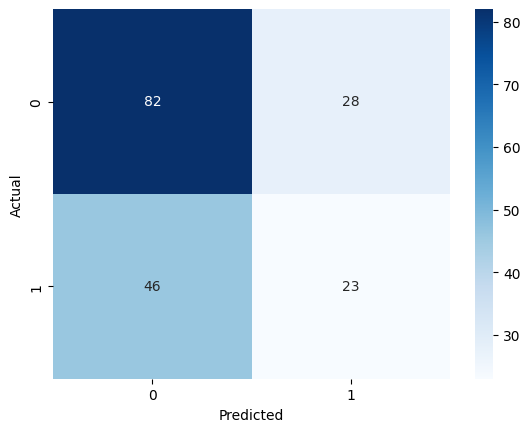

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()  

### 4.5 Report Decision Tree Plot

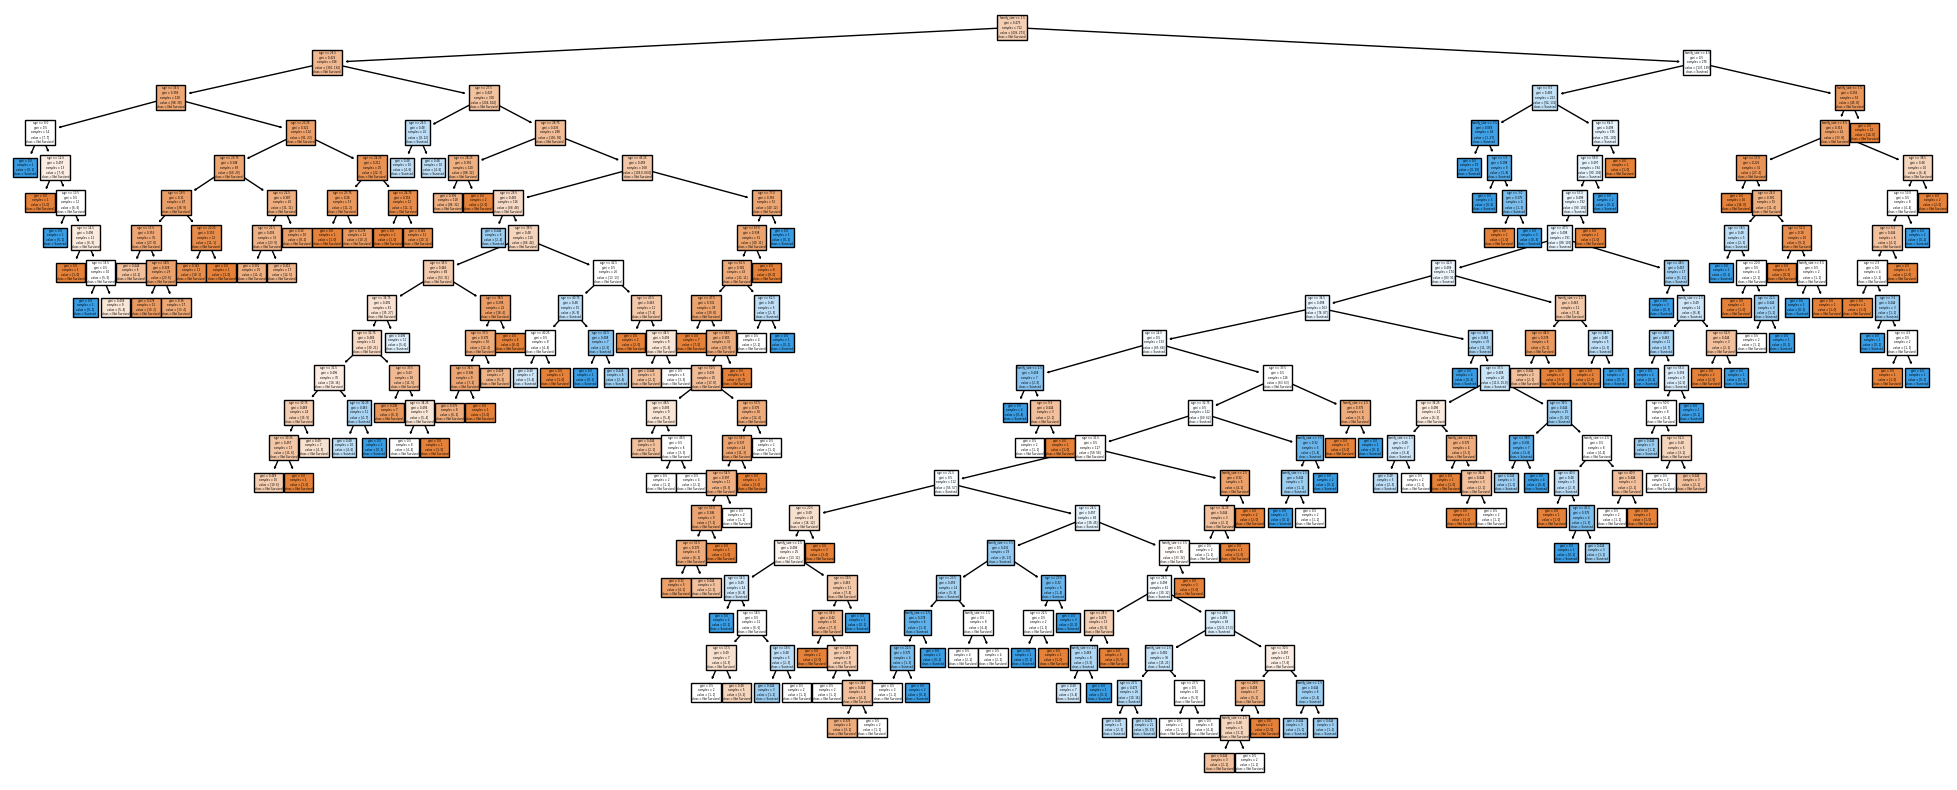

In [20]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25,10))
plot_tree(tree_model, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()
fig.savefig("decision_tree_titanic.png")

### Repeat for All 3 Cases
Try this for the 3 different cases: 1) using alone as the only input  2) using weight as the only input and 3) using height and weight together as inputs. 

For each different case, redefine the input features in Section 3 (comment out the old case inputs X and target y and uncomment the new case inputs X and target y), then re-run Sections 4 and 5 for each case. Record your results in a Markdown table.

In [24]:
# Case 1: Use 'alone' as the only input feature
X = titanic[['alone']]  # Input feature: alone
y = titanic['survived']  # Target variable: survived

# Split the data using StratifiedShuffleSplit
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter.split(X, y):
    X_train = X.iloc[train_indices]
    X_test = X.iloc[test_indices]
    y_train = y.iloc[train_indices]
    y_test = y.iloc[test_indices]

# Train the Decision Tree model
tree_model = DecisionTreeClassifier(random_state=123)
tree_model.fit(X_train, y_train)  # Train the model on the training data

# Predict and evaluate training data (X_train)
y_train_pred = tree_model.predict(X_train)  # Make predictions on training data

print("Results for Decision Tree on training data (Case 1: Alone Only):")
print(classification_report(y_train, y_train_pred))  # Evaluate model's performance on training data

# Predict and evaluate test data (X_test)
y_test_pred = tree_model.predict(X_test)  # Make predictions on test data

print("Results for Decision Tree on test data (Case 1: Alone Only):")
print(classification_report(y_test, y_test_pred))  # Evaluate model's performance on test data




Results for Decision Tree on training data (Case 1: Alone Only):
              precision    recall  f1-score   support

           0       0.69      0.69      0.69       439
           1       0.50      0.51      0.51       273

    accuracy                           0.62       712
   macro avg       0.60      0.60      0.60       712
weighted avg       0.62      0.62      0.62       712

Results for Decision Tree on test data (Case 1: Alone Only):
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       110
           1       0.51      0.58      0.54        69

    accuracy                           0.63       179
   macro avg       0.61      0.62      0.61       179
weighted avg       0.64      0.63      0.63       179



In [25]:
# Case 2: Use 'age' as the only input feature
X = titanic[['age']]  # Input feature: age
y = titanic['survived']  # Target variable: survived

# Split the data using StratifiedShuffleSplit
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter.split(X, y):
    X_train = X.iloc[train_indices]
    X_test = X.iloc[test_indices]
    y_train = y.iloc[train_indices]
    y_test = y.iloc[test_indices]

# Train the Decision Tree model
tree_model = DecisionTreeClassifier(random_state=123)
tree_model.fit(X_train, y_train)  # Train the model on the training data

# Predict and evaluate training data (X_train)
y_train_pred = tree_model.predict(X_train)  # Make predictions on training data

print("Results for Decision Tree on training data (Case 2: Age Only):")
print(classification_report(y_train, y_train_pred))  # Evaluate model's performance on training data

# Predict and evaluate test data (X_test)
y_test_pred = tree_model.predict(X_test)  # Make predictions on test data

print("Results for Decision Tree on test data (Case 2: Age Only):")
print(classification_report(y_test, y_test_pred))  # Evaluate model's performance on test data


Results for Decision Tree on training data (Case 2: Age Only):
              precision    recall  f1-score   support

           0       0.68      0.92      0.78       439
           1       0.69      0.29      0.41       273

    accuracy                           0.68       712
   macro avg       0.68      0.61      0.60       712
weighted avg       0.68      0.68      0.64       712

Results for Decision Tree on test data (Case 2: Age Only):
              precision    recall  f1-score   support

           0       0.63      0.89      0.74       110
           1       0.50      0.17      0.26        69

    accuracy                           0.61       179
   macro avg       0.57      0.53      0.50       179
weighted avg       0.58      0.61      0.55       179



In [26]:
# Case 3: Use 'age' and 'family_size' as input features
X = titanic[['age', 'family_size']]  # Input features: age and family_size
y = titanic['survived']  # Target variable: survived

# Split the data using StratifiedShuffleSplit
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter.split(X, y):
    X_train = X.iloc[train_indices]
    X_test = X.iloc[test_indices]
    y_train = y.iloc[train_indices]
    y_test = y.iloc[test_indices]

# Train the Decision Tree model
tree_model = DecisionTreeClassifier(random_state=123)
tree_model.fit(X_train, y_train)  # Train the model on the training data

# Predict and evaluate training data (X_train)
y_train_pred = tree_model.predict(X_train)  # Make predictions on training data

print("Results for Decision Tree on training data (Case 3: Age + Family Size):")
print(classification_report(y_train, y_train_pred))  # Evaluate model's performance on training data

# Predict and evaluate test data (X_test)
y_test_pred = tree_model.predict(X_test)  # Make predictions on test data

print("Results for Decision Tree on test data (Case 3: Age + Family Size):")
print(classification_report(y_test, y_test_pred))  # Evaluate model's performance on test data


Results for Decision Tree on training data (Case 3: Age + Family Size):
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       439
           1       0.77      0.56      0.65       273

    accuracy                           0.77       712
   macro avg       0.77      0.73      0.74       712
weighted avg       0.77      0.77      0.76       712

Results for Decision Tree on test data (Case 3: Age + Family Size):
              precision    recall  f1-score   support

           0       0.64      0.75      0.69       110
           1       0.45      0.33      0.38        69

    accuracy                           0.59       179
   macro avg       0.55      0.54      0.54       179
weighted avg       0.57      0.59      0.57       179



### Reflection 4:
How well did the different cases perform? 

The case with alone did the weakest compared to the case with age or age and family together.

Are there any surprising results? Yes those which included age had higher rate of survival. 

Which inputs worked better? The third case with age and family togher gave the highest rate of survival, where having two features is indicative of higher chance of survival.

### Section 5. Compare Alternative Models (SVC, NN)

##### In a Support Vector Machine, the kernel function defines how the algorithm transforms data to find a hyperplane that separates the classes. If the data is not linearly separable, changing the kernel can help the model find a better decision boundary.

#### SVC Kernel: Common Types

#### RBF (Radial Basis Function) – Most commonly used; handles non-linear data well (default)
Linear – Best for linearly separable data (straight line separation)
Polynomial – Useful when the data follows a curved pattern
Sigmoid – Similar to a neural network activation function; less common
Commenting the options in and out in the code can be helpful. The analyst decides which to use based on their understanding of the results.

#### SVC Kernel: How to Choose

Start with linear if you suspect the data is linearly separable.
Use RBF if the data is complex or you aren’t sure.
Try polynomial if the data seems to follow a curved boundary.
Use sigmoid for experiments (rarely the best choice).
SVC Kernel: Common Issues and Techniques

If the model takes too long to train, reduce the degree for polynomial kernels.
If support_vectors_ gives an error, the data may not be separable with the current kernel. Try switching to RBF or adjusting the C (regularization) value.
If the model misclassifies many points, then increase/decrease gamma or C.
Your process is valuable - record the work you do and the temporary results in your reflections and insights. To show your skills, show and tell us about your analysis process. Professional communication is key.

In [ ]:
# RBF Kernel (default) - same as calling SVC()
svc_model = SVC(kernel='rbf')
svc_model.fit(X_train, y_train)

# Linear Kernel
svc_model = SVC(kernel='linear')
svc_model.fit(X_train, y_train)

# Polynomial Kernel (e.g., with degree=3)
svc_model = SVC(kernel='poly', degree=3)
svc_model.fit(X_train, y_train)

# Sigmoid Kernel
svc_model = SVC(kernel='sigmoid')
svc_model.fit(X_train, y_train)

### 5.1 Train and Evaluate Model (SVC)

In [29]:
# First, train an SVC model using the default kernel.

from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train, y_train)

#Predict and evaluate the SVC model:

y_pred_svc = svc_model.predict(X_test)

print("Results for SVC on test data:")
print(classification_report(y_test, y_pred_svc))

Results for SVC on test data:
              precision    recall  f1-score   support

           0       0.63      0.98      0.77       110
           1       0.71      0.07      0.13        69

    accuracy                           0.63       179
   macro avg       0.67      0.53      0.45       179
weighted avg       0.66      0.63      0.52       179



#### Visualize Support Vectors
Create a scatter plot to visualize the support vectors. This helps understand how the SVM model separates the data.
Step-by-Step Process:

1) Split the data into two groups:

Survived – Passengers who survived the Titanic sinking (value = 1).
Not Survived – Passengers who did not survive (value = 0).
2) Create a scatter plot of these two groups using different colors and markers:

Yellow squares ('s') for survived passengers
Cyan triangles ('^') for non-survived passengers
3) Overlay the support vectors on top of the plot:

Black pluses ('+') will represent the support vectors.
Since the support vectors are plotted last, they appear on top of the data points and are not obscured.

NOTE:  The support_vectors_ attribute might give an error if the model didn't converge or if the problem is not linearly separable. To try to get it to converge, try adjusting the kernel or tuning hyperparameters (more on this below). 

Adjust the charting accordingly. 

In [35]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Copy the DataFrame
df = titanic.copy()

# Encode 'sex' to numeric
le = LabelEncoder()
df['sex_encoded'] = le.fit_transform(df['sex'])

# Define features and target
X = df[['age', 'fare', 'sex_encoded', 'alone', 'pclass']]
y = df['survived']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the SVC model with RBF kernel and balanced class weights
svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(X_train, y_train)

# Predict on test set
y_pred = svc_rbf.predict(X_test)

# Evaluate
print("Results for SVC (RBF kernel, multiple features) on test data:")
print(classification_report(y_test, y_pred, zero_division=0))
  





Results for SVC (RBF kernel, multiple features) on test data:
              precision    recall  f1-score   support

           0       0.64      0.94      0.76       105
           1       0.75      0.24      0.37        74

    accuracy                           0.65       179
   macro avg       0.69      0.59      0.56       179
weighted avg       0.68      0.65      0.60       179



### 5.2 Train and Evaluate Model (NN MLP)

In [ ]:
# We have some hyper parameters that we can adjust. For the other models we just let them run with their defaults. Here we are going to use 3 hidden layers and change up the solver to one that is more likely to give good results for a small data set.
# Sample
# Train a neural network model:
from sklearn.neural_network import MLPClassifier


nn_model = MLPClassifier(hidden_layer_sizes=(50, 25, 10), solver='lbfgs')
nn_model.fit(X_train, y_train) 


In [41]:
# modified
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# Step 1: Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Apply scaling to the training data
X_test_scaled = scaler.transform(X_test)  # Apply the same scaling to the test data

# Step 2: Define and train the neural network model
nn_model = MLPClassifier(hidden_layer_sizes=(50, 25, 10), solver='lbfgs', max_iter=1000, random_state=123)
nn_model.fit(X_train_scaled, y_train)  # Train the model on scaled data

# Step 3: Predict on the training data and evaluate performance
y_train_pred = nn_model.predict(X_train_scaled)
print("Results for Neural Network on training data:")
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred))

# Step 4: Predict on the test data and evaluate performance
y_test_pred = nn_model.predict(X_test_scaled)
print("Results for Neural Network on test data:")
print(classification_report(y_test, y_test_pred))


Results for Neural Network on training data:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       444
           1       0.94      0.90      0.92       268

    accuracy                           0.94       712
   macro avg       0.94      0.93      0.94       712
weighted avg       0.94      0.94      0.94       712

Results for Neural Network on test data:
              precision    recall  f1-score   support

           0       0.79      0.80      0.80       105
           1       0.71      0.70      0.71        74

    accuracy                           0.76       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.76      0.76      0.76       179



c:\Users\19564\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [38]:
# Predict and evaluate Neural Network model:

y_pred_nn = nn_model.predict(X_test)

print("Results for Neural Network on test data:")
print(classification_report(y_test, y_pred_nn))


Results for Neural Network on test data:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       105
           1       0.78      0.69      0.73        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



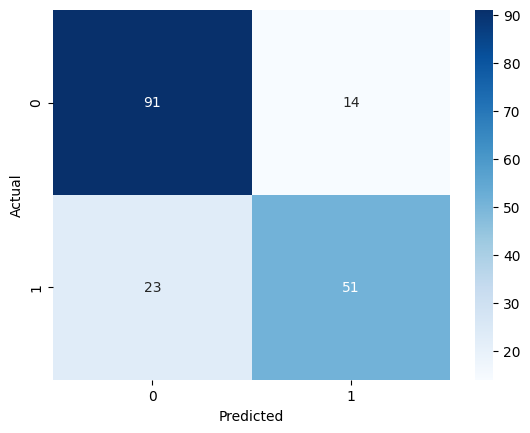

In [39]:
# Plot confusion matrix:

cm_nn = confusion_matrix(y_test, y_pred_nn)
sns.heatmap(cm_nn, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Reflection 5:
How well did each model perform?

Decision Tree: I think the decision tree preformed well.
Support Vector Machine (SVM): The SVM did well however did have an issue to converge.
Neural Network (MLP): The neural network model, did well, it is good for complex data bur requires more iterations to gather complex patterns.

Are there any surprising results?

How the decision tree model may overfit to the training data and can lead to a performance gap between the training and test sets.Also, the SVM not converging was surprising.The data might need better preprocessing or the model needs tuning to ensure convergence. Neural networks often require careful tuning of the learning rate.

Why might one model outperform the others?

This could be due to the data characteristics,ifthe dataset has a lot of linear relationships, a SVM with a linear kernel might perform better. If the dataset has more complex relationships, neural networks can model non-linear patterns. However neural networks need proper scaling and tuning to converge properly. DecisionTrees might overfit to the training data if they are too deep or complex. and SVM may fail to converge if not tuned correctly.

### Section 6. Final Thoughts & Insights



#### 6.1 Summarize Findings

What indicators are strong predictors of gender? sex, Name, Title, Age, Pclass

Decision Tree performed well but overfit slightly on training data.
This means that it learned the details of the training set but struggled to generalize to unseen data (test set).Pruning can be used to mitigate this.

Neural Network showed moderate improvement but introduced complexity.

 NN's  have a high capacity for modeling non-linear relationships in data. However, they also require tuning of hyperparameters and sufficient data to train well,small datasets, neural networks can easily overfit and are harder to interpret compared to decision trees.

### 6.2 Discuss Challenges Faced

Small sample size could limit generalizability.
If the sample size is too small for example this could affect the models ability to generalize and predict data.

Missing values (if any) could bias the model.
Yes, missing values can affect the data particularly the accuracy. Data should be deleted or cleaned up as necessary before beginging project.

### 6.3 Next Steps
Test more features (e.g., BMI class).
Try hyperparameter tuning for better results.

Playing with Hyperparameters

Decision Tree 

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.htmlLinks to an external site.
Try changing max depth and min samples. (Both are an attempt to avoid overfitting.)
SVM SVC

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.htmlLinks to an external site.
Try different kernels like linear and poly
NN MLP 

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.htmlLinks to an external site.
Try changing the number of layers, the number of nodes per layer, change the activation function, change the learning rate. Change the solver.
Use Randomized split – true

In [42]:
#1 Decision Tree 

# Import the necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedShuffleSplit

# Case 3: age + family_size
X = titanic[['age', 'family_size']]  # X is a DataFrame with 'age' and 'family_size'
y = titanic['survived']  # y is a Series with the target 'survived'

# Split the data using StratifiedShuffleSplit
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter.split(X, y):
    X_train = X.iloc[train_indices]
    X_test = X.iloc[test_indices]
    y_train = y.iloc[train_indices]
    y_test = y.iloc[test_indices]

# Train the Decision Tree model with max_depth and min_samples_split to avoid overfitting
tree_model = DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=123)  # Adjust these values to control overfitting
tree_model.fit(X_train, y_train)  # Train the model before predicting

# Evaluate model performance on training data
y_pred = tree_model.predict(X_train)  # Now you can predict on the training data

print("Results for Decision Tree on training data:")
print(classification_report(y_train, y_pred))  # Evaluate the model's performance


Results for Decision Tree on training data:
              precision    recall  f1-score   support

           0       0.72      0.77      0.75       439
           1       0.59      0.53      0.56       273

    accuracy                           0.68       712
   macro avg       0.66      0.65      0.65       712
weighted avg       0.67      0.68      0.68       712



In [ ]:
# SVM SVC
# With different Kernels like linear and poly

# Import the necessary libraries
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import classification_report
import pandas as pd


# Case 3: age + family_size
X = titanic[['age', 'family_size']]  # X is a DataFrame with 'age' and 'family_size'
y = titanic['survived']  # y is a Series with the target 'survived'

# Split the data using StratifiedShuffleSplit
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter.split(X, y):
    X_train = X.iloc[train_indices]
    X_test = X.iloc[test_indices]
    y_train = y.iloc[train_indices]
    y_test = y.iloc[test_indices]

# Linear kernel
svc_linear = SVC(kernel='linear', random_state=123)
svc_linear.fit(X_train, y_train)

# Evaluate model performance on training data
y_train_pred_linear = svc_linear.predict(X_train)
print("Results for SVC with Linear Kernel on training data:")
print(classification_report(y_train, y_train_pred_linear))

# Evaluate on test data
y_test_pred_linear = svc_linear.predict(X_test)
print("Results for SVC with Linear Kernel on test data:")
print(classification_report(y_test, y_test_pred_linear))

# Polynomial kernel
svc_poly = SVC(kernel='poly', degree=3, random_state=123)  # You can adjust the degree parameter
svc_poly.fit(X_train, y_train)

# Evaluate model performance on training data
y_train_pred_poly = svc_poly.predict(X_train)
print("Results for SVC with Polynomial Kernel on training data:")
print(classification_report(y_train, y_train_pred_poly))

# Evaluate on test data
y_test_pred_poly = svc_poly.predict(X_test)
print("Results for SVC with Polynomial Kernel on test data:")
print(classification_report(y_test, y_test_pred_poly))



Results for SVC with Linear Kernel on training data:
              precision    recall  f1-score   support

           0       0.62      1.00      0.76       439
           1       0.00      0.00      0.00       273

    accuracy                           0.62       712
   macro avg       0.31      0.50      0.38       712
weighted avg       0.38      0.62      0.47       712

Results for SVC with Linear Kernel on test data:
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       110
           1       0.00      0.00      0.00        69

    accuracy                           0.61       179
   macro avg       0.31      0.50      0.38       179
weighted avg       0.38      0.61      0.47       179



c:\Users\19564\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\19564\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\19564\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Results for SVC with Polynomial Kernel on training data:
              precision    recall  f1-score   support

           0       0.62      1.00      0.76       439
           1       0.00      0.00      0.00       273

    accuracy                           0.62       712
   macro avg       0.31      0.50      0.38       712
weighted avg       0.38      0.62      0.47       712

Results for SVC with Polynomial Kernel on test data:
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       110
           1       0.00      0.00      0.00        69

    accuracy                           0.61       179
   macro avg       0.31      0.50      0.38       179
weighted avg       0.38      0.61      0.47       179



c:\Users\19564\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\19564\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\19564\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [ ]:
# NN MLP 
# Try changing the number of layers, the number of nodes per layer and learning rate

# Import necessary libraries
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd


# Case: age + family_size as features
X = titanic[['age', 'family_size']]
y = titanic['survived']

# Randomized train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Step 1: Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Apply scaling to the training data
X_test_scaled = scaler.transform(X_test)  # Apply the same scaling to the test data

# Step 2: Define and train the neural network model with different settings

# Experiment 1: Change number of layers, nodes per layer, and learning rate

nn_model = MLPClassifier(
    hidden_layer_sizes=(150, 75, 35),  # 3 hidden layers with 150, 75, and 35 nodes respectively
    activation='relu',  # ReLU activation function
    solver='adam',  # Adam optimizer
    learning_rate_init=0.005,  # Change the learning rate to 0.005
    max_iter=1000,  # Maximum number of iterations
    random_state=123
)

# Train the model
nn_model.fit(X_train_scaled, y_train)

# Step 3: Predict on the training data and evaluate performance
y_train_pred = nn_model.predict(X_train_scaled)
print("Results for Neural Network on training data:")
print(classification_report(y_train, y_train_pred))

# Step 4: Predict on the test data and evaluate performance
y_test_pred = nn_model.predict(X_test_scaled)
print("Results for Neural Network on test data:")
print(classification_report(y_test, y_test_pred))






Results for Neural Network on training data:
              precision    recall  f1-score   support

           0       0.70      0.84      0.76       435
           1       0.63      0.43      0.51       277

    accuracy                           0.68       712
   macro avg       0.66      0.63      0.64       712
weighted avg       0.67      0.68      0.66       712

Results for Neural Network on test data:
              precision    recall  f1-score   support

           0       0.69      0.81      0.74       114
           1       0.51      0.35      0.42        65

    accuracy                           0.64       179
   macro avg       0.60      0.58      0.58       179
weighted avg       0.62      0.64      0.62       179

